In [25]:
Pkg.add("DataFrames")
Pkg.add("Gadfly")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of DataFrames
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Gadfly
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
cd("/Users/utensil/experiments")

In [4]:
run(`git clone https://github.com/JuliaLang/julia.git`)

Cloning into 'julia'...


In [3]:
cd("julia/test/perf/micro")

In [4]:
run(pipeline(`python perf.py`, stdout="py.csv"))

In [5]:
run(pipeline(`julia perf.jl`, stdout="jl.csv"))

In [6]:
run(pipeline(`r --vanilla --slave -f perf.R`, stdout="r.csv"))

载入需要的程辑包：compiler


In [7]:
run(pipeline(`cat py.csv r.csv`, stdout="benchmarks.csv"))

In [8]:
using DataFrames
using Gadfly

In [10]:
jl_data = readtable("jl.csv", header=false, names=[:language, :benchmark, :min, :max, :mean_time, :std])

,language,benchmark,min,max,mean_time,std
1,julia,fib,0.056615,12.929825,0.06721,0.095576
2,julia,parse_int,0.184276,14.152507,0.240393,0.233401
3,julia,mandel,0.207146,15.422047,0.254343,0.232392
4,julia,quicksort,0.37266,4.646582,0.442788,0.085605
5,julia,pi_sum,23.337202,40.237361,26.38479,2.331499
6,julia,rand_mat_stat,20.954935,58.0542,24.982474,5.086046
7,julia,rand_mat_mul,36.421051,49.189161,39.883087,3.066839
8,julia,printfd,25.061242,34.104159,27.590273,1.608627


In [18]:
benchmarks = readtable("benchmarks.csv", header=false, names=[:language, :benchmark, :mean_time])

,language,benchmark,mean_time
1,python,fib,2.87795066833
2,python,parse_int,2.0809173584
3,python,mandel,3.95393371582
4,python,quicksort,14.358997345
5,python,pi_sum,652.050018311
6,python,rand_mat_stat,125.365018845
7,python,rand_mat_mul,66.064119339
8,r,fib,16.0
9,r,parse_int,4.0
10,r,quicksort,93.0


In [19]:
jl_benchmarks = jl_data[:, [:language, :benchmark, :mean_time]]

,language,benchmark,mean_time
1,julia,fib,0.06721
2,julia,parse_int,0.240393
3,julia,mandel,0.254343
4,julia,quicksort,0.442788
5,julia,pi_sum,26.38479
6,julia,rand_mat_stat,24.982474
7,julia,rand_mat_mul,39.883087
8,julia,printfd,27.590273


In [20]:
benchmarks = [benchmarks; jl_benchmarks]

,language,benchmark,mean_time
1,python,fib,2.87795066833
2,python,parse_int,2.0809173584
3,python,mandel,3.95393371582
4,python,quicksort,14.358997345
5,python,pi_sum,652.050018311
6,python,rand_mat_stat,125.365018845
7,python,rand_mat_mul,66.064119339
8,r,fib,16.0
9,r,parse_int,4.0
10,r,quicksort,93.0


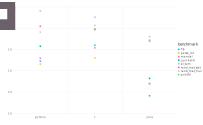

In [21]:
p = plot(benchmarks,
    x = :language,
    y = :mean_time,
    color = :benchmark,
    Scale.y_log10,
    Guide.ylabel(nothing),
    Guide.xlabel(nothing),
    Theme(
        default_point_size = 1mm,
        guide_title_position = :left,
        colorkey_swatch_shape = :circle,
        minor_label_font = "Georgia",
        major_label_font = "Georgia",
    ),
)
draw(SVG(8inch,8inch/golden), p)

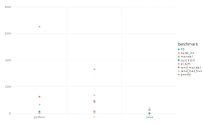

In [23]:
p = plot(benchmarks,
    x = :language,
    y = :mean_time,
    color = :benchmark,
    Scale.y_continuous,
    Guide.ylabel(nothing),
    Guide.xlabel(nothing),
    Theme(
        default_point_size = 1mm,
        guide_title_position = :left,
        colorkey_swatch_shape = :circle,
        minor_label_font = "Georgia",
        major_label_font = "Georgia",
    ),
)
draw(SVG(8inch,8inch/golden), p)